In [ ]:
import numpy as np
import pandas as pd
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyunpack
!pip install patool
!pip install py7zr

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

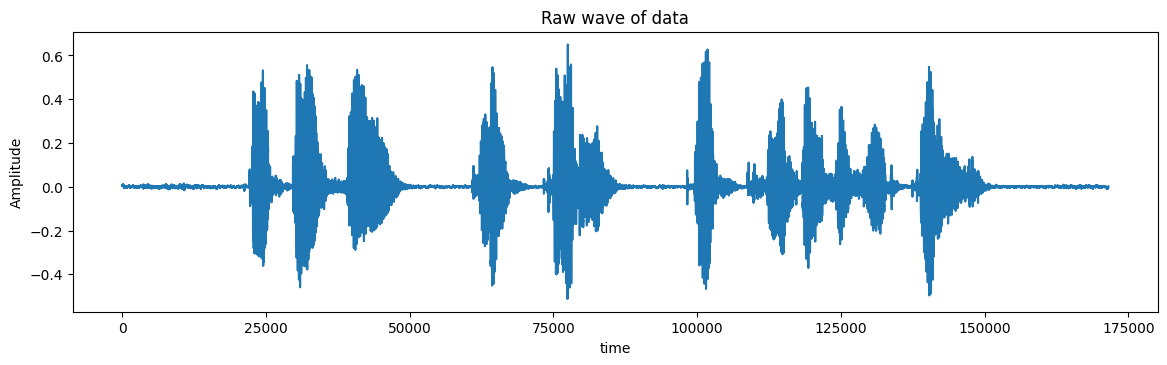

In [ ]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav', sr = 40000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

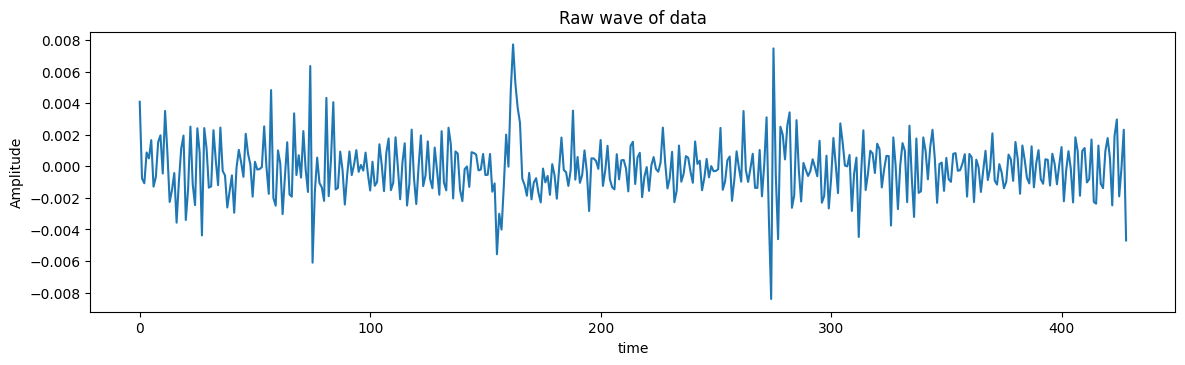

In [ ]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

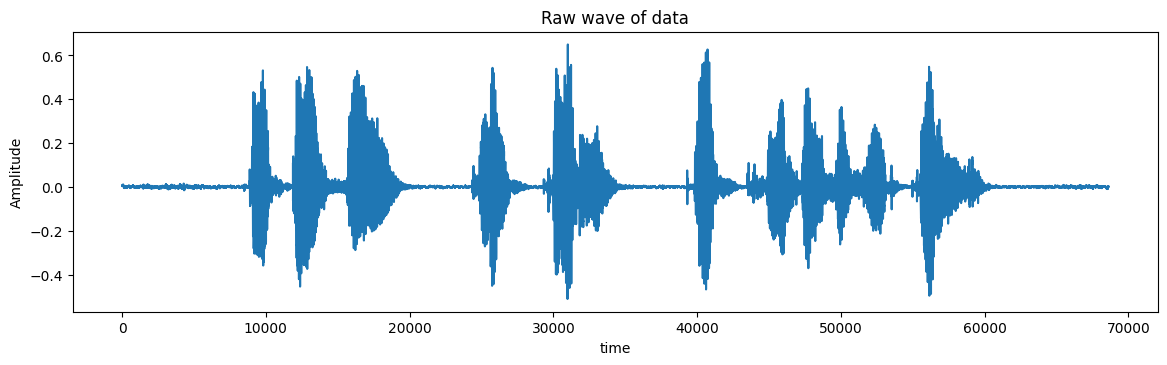

In [ ]:
sample_rate=16000
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav', sr = sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)
ipd.Audio(samples, rate=sample_rate)


# Labelling and dataframe

In [ ]:
import os
path="/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets"

# Change the directory
os.chdir(path)
path

'/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets'

In [ ]:
os.listdir()

['Kannada', 'Hindi', 'Bengali', 'Marathi', 'Tamil', 'Malayalam', 'Telugu']

In [ ]:
import librosa
from sklearn.model_selection import train_test_split

In [ ]:
audio_list=[]
label_list=[]
full_path_list=[]
for j in os.listdir(path):
  for i in os.listdir(path+'/'+j):
    audio_list.append(i)
    label_list.append(j)
    full_path=path+"/"+j+"/"+i
    full_path_list.append(full_path)

In [ ]:
metadata1=pd.DataFrame(full_path_list,columns=['full path'])
metadata2=pd.DataFrame(label_list,columns=['Class'])
final_metadata = pd.concat([metadata1, metadata2], axis=1)

In [ ]:
metadata2

,Class
0,Kannada
1,Kannada
2,Kannada
3,Kannada
4,Kannada
...,...
6582,Telugu
6583,Telugu
6584,Telugu
6585,Telugu


In [ ]:
final_metadata

,full path,Class
0,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Kannada
1,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Kannada
2,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Kannada
3,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Kannada
4,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Kannada
...,...,...
6582,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu
6583,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu
6584,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu
6585,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu


In [ ]:
labels=os.listdir(path)


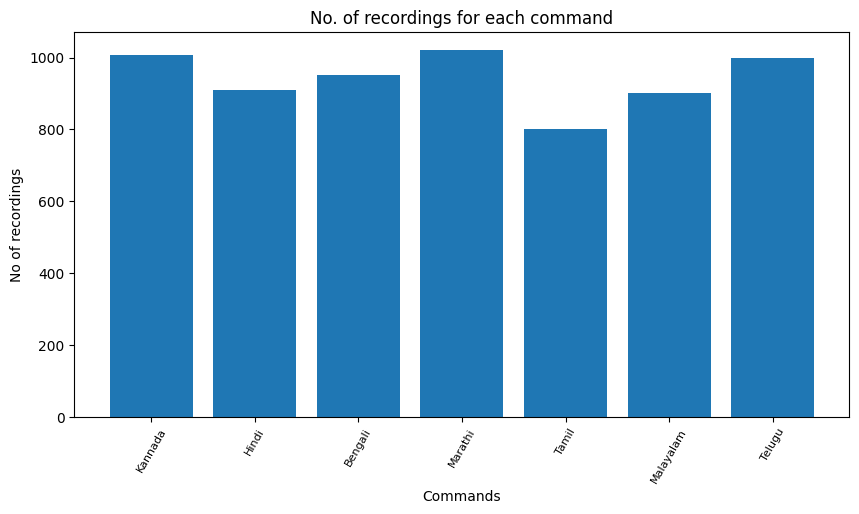

In [ ]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

#plot
plt.figure(figsize=(10,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=10)
plt.ylabel('No of recordings', fontsize=10)
plt.xticks(index, labels, fontsize=8, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

# Feature extraction

In [ ]:
y, sr = librosa.load("/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav",sr=1000)
y

array([ 0.00283563,  0.00612354,  0.00578164, ..., -0.00309004,
        0.00102975,  0.        ], dtype=float32)

In [ ]:
g=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=14)

In [ ]:
g

array([[-91.354164 ,   8.2135105,  13.451161 ,  27.245552 ,  36.773308 ,
          7.9451756,  20.393032 ,   8.496858 , -68.54078  ],
       [-30.42646  , -44.734035 , -53.02015  , -78.638504 , -87.76258  ,
        -51.237373 , -52.991028 , -69.63844  , -47.917973 ],
       [-40.2817   , -64.404526 , -68.60042  , -70.35275  , -65.30181  ,
        -61.028053 , -70.36246  , -70.05961  , -49.741253 ],
       [ 21.299267 ,  -1.6624643,  -7.918603 ,   6.335641 ,   1.4031129,
        -12.54231  , -17.781055 ,  -7.794032 ,   5.924755 ],
       [-41.557358 , -43.260754 , -42.935593 , -45.44297  , -46.236187 ,
        -38.688995 , -34.656654 , -39.48002  , -31.007881 ],
       [ 19.98996  ,  30.104328 ,  30.268589 ,  31.17049  ,  27.711212 ,
         40.584137 ,  42.175716 ,  26.973862 ,  28.230536 ],
       [-12.938786 , -15.76582  ,   1.7899922,  31.958622 ,  19.576555 ,
         -8.944496 , -15.379667 , -29.6646   , -43.581    ],
       [ 57.91042  ,  54.027245 ,  51.37503  ,  48.72072  ,  5

In [ ]:
g.shape

(14, 9)

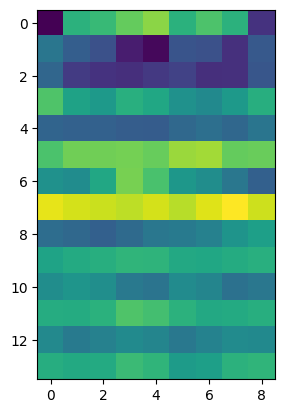

In [ ]:
plt.imshow(g)

In [ ]:
import glob
wave_file = glob.glob(path +"/*.wav")

In [ ]:
scale_feature=[]
for i in final_metadata['full path']:
  # print(i)
  # librosa.load(i)

  samples,sample_rate=librosa.load(i)
  g=librosa.feature.mfcc(y=samples,sr=sample_rate,n_mfcc=14)

  mfcc_scaled=np.mean(g.T,axis=0)
  scale_feature.append(mfcc_scaled)

In [ ]:
scale_feature

[array([-4.01613495e+02,  1.27781563e+02, -1.51279888e+01,  2.56279812e+01,
        -3.10941195e+00, -1.20724401e+01, -9.19302559e+00, -1.15150064e-01,
        -6.81257248e+00,  5.33281326e+00, -4.95209265e+00, -9.76765347e+00,
         3.95611954e+00, -2.43369198e+00], dtype=float32),
 array([-393.31107   ,  122.77774   ,   -0.94058734,    8.721099  ,
          -6.223454  ,   -6.999533  ,   -7.323746  ,    1.7765226 ,
          -0.9553876 ,    5.972718  ,    2.907881  ,   -4.7654724 ,
           4.2210956 ,    1.6850868 ], dtype=float32),
 array([-423.88284  ,  140.98557  ,  -18.292786 ,   22.131664 ,
          -5.2795424,   -1.8747219,   -6.2287793,    3.4696143,
          -6.285118 ,    6.3416233,   -2.8973157,  -13.935064 ,
           3.4727466,   -5.329385 ], dtype=float32),
 array([-431.90976  ,  117.2324   ,    4.1999497,   18.237534 ,
           1.1591357,   -7.501689 ,   -6.65631  ,    1.5805918,
          -4.2684326,    6.522715 ,    1.9249856,   -7.4256053,
           3.0928

# Dataframe of MFCC

In [ ]:
df_mfcc=pd.DataFrame(scale_feature)

In [ ]:
df_mfcc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-401.613495,127.781563,-15.127989,25.627981,-3.109412,-12.072440,-9.193026,-0.115150,-6.812572,5.332813,-4.952093,-9.767653,3.956120,-2.433692
1,-393.311066,122.777740,-0.940587,8.721099,-6.223454,-6.999533,-7.323746,1.776523,-0.955388,5.972718,2.907881,-4.765472,4.221096,1.685087
2,-423.882843,140.985565,-18.292786,22.131664,-5.279542,-1.874722,-6.228779,3.469614,-6.285118,6.341623,-2.897316,-13.935064,3.472747,-5.329385
3,-431.909760,117.232399,4.199950,18.237534,1.159136,-7.501689,-6.656310,1.580592,-4.268433,6.522715,1.924986,-7.425605,3.092833,1.897230
4,-376.510986,129.410995,-8.273857,10.119737,-2.991234,-2.303875,-11.970129,15.331419,-3.674037,9.884022,3.943642,-11.774728,7.999715,-2.547139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,-445.851562,147.462845,12.675552,30.269295,10.263466,6.589751,-16.506947,-3.165465,0.890960,-0.572254,-0.252087,-0.682174,7.997992,-8.942049
6583,-443.683319,139.045914,10.684545,45.747982,16.329605,4.076168,-9.520866,-0.403483,-5.913675,0.415427,-2.836927,-7.121993,5.089151,-10.028808
6584,-427.387054,147.000336,13.154522,21.333727,19.178196,6.493382,-15.327624,-9.215030,-1.496473,1.409057,-1.244980,-2.802243,4.733148,-3.728420
6585,-447.299194,137.844315,30.824505,24.131374,14.569251,13.284329,-21.000107,-3.749257,2.244350,-3.395008,5.859928,0.162908,-1.155062,-5.935435


In [ ]:
#labelled dataframe of MFCC
finaldf = pd.concat([df_mfcc,metadata2], axis=1)

In [ ]:
finaldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Class
0,-401.613495,127.781563,-15.127989,25.627981,-3.109412,-12.072440,-9.193026,-0.115150,-6.812572,5.332813,-4.952093,-9.767653,3.956120,-2.433692,Kannada
1,-393.311066,122.777740,-0.940587,8.721099,-6.223454,-6.999533,-7.323746,1.776523,-0.955388,5.972718,2.907881,-4.765472,4.221096,1.685087,Kannada
2,-423.882843,140.985565,-18.292786,22.131664,-5.279542,-1.874722,-6.228779,3.469614,-6.285118,6.341623,-2.897316,-13.935064,3.472747,-5.329385,Kannada
3,-431.909760,117.232399,4.199950,18.237534,1.159136,-7.501689,-6.656310,1.580592,-4.268433,6.522715,1.924986,-7.425605,3.092833,1.897230,Kannada
4,-376.510986,129.410995,-8.273857,10.119737,-2.991234,-2.303875,-11.970129,15.331419,-3.674037,9.884022,3.943642,-11.774728,7.999715,-2.547139,Kannada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,-445.851562,147.462845,12.675552,30.269295,10.263466,6.589751,-16.506947,-3.165465,0.890960,-0.572254,-0.252087,-0.682174,7.997992,-8.942049,Telugu
6583,-443.683319,139.045914,10.684545,45.747982,16.329605,4.076168,-9.520866,-0.403483,-5.913675,0.415427,-2.836927,-7.121993,5.089151,-10.028808,Telugu
6584,-427.387054,147.000336,13.154522,21.333727,19.178196,6.493382,-15.327624,-9.215030,-1.496473,1.409057,-1.244980,-2.802243,4.733148,-3.728420,Telugu
6585,-447.299194,137.844315,30.824505,24.131374,14.569251,13.284329,-21.000107,-3.749257,2.244350,-3.395008,5.859928,0.162908,-1.155062,-5.935435,Telugu


In [ ]:
finaldf.to_csv('/content/drive/MyDrive/MiniProject/datasetfinaldf.csv')

# Model Building

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
def get_keras_dataset(df):
    X = {str(col) : np.array(df_mfcc[col]) for col in df_mfcc.columns}
    return X

In [ ]:
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
target_col = ['Churn']
ignored_cols = ['customerID']
categorical_cols = finaldf.select_dtypes(include='object').columns
categorical_cols = [col for col in categorical_cols if col not in target_col + ignored_cols]

In [51]:
categorical_cols

['Class']

In [ ]:
FEATURE_COLS = numeric_cols + categorical_cols
TARGET_COL = 'Churn'
EPOCHS = 50
BATCH_SIZE = 4
CLASS_WEIGHTS = {0 : 1., 1 : 2.5}

In [ ]:
train_df, test_df = train_test_split(finaldf, test_size=0.15, random_state=42)
print(train_df.shape)

(5598, 15)


In [ ]:
K.clear_session()

In [ ]:
cat_inputs = []
num_inputs = []
embeddings = []
embedding_layer_names = []
emb_n = 10

In [45]:
finaldf[col].max()

'Telugu'

In [50]:
categorical_cols

['Class']

In [49]:
for col in categorical_cols:
  print(col+'_emb')

Class_emb


In [44]:
# Embedding for categorical features
for col in categorical_cols:
    _input = layers.Input(shape=[1], name=col)
    _embed = layers.Embedding(finaldf[col].max() + 1, emb_n, name=col+'_emb')(_input)
    # cat_inputs.append(_input)
    # embeddings.append(_embed)
    # embedding_layer_names.append(col+'_emb')

TypeError: ignored

In [ ]:
# Simple inputs for the numeric features
for col in numeric_cols:
    numeric_input = layers.Input(shape=(1,), name=col)
    num_inputs.append(numeric_input)

In [ ]:
# Merge the numeric inputs
merged_num_inputs = layers.concatenate(num_inputs)

In [ ]:
# MLP for classification
x = layers.Dropout(0.2)(layers.Dense(100, activation='relu')(all_features))
x = layers.Dropout(0.2)(layers.Dense(50, activation='relu')(x))
x = layers.Dropout(0.2)(layers.Dense(25, activation='relu')(x))
x = layers.Dropout(0.2)(layers.Dense(15, activation='relu')(x))

NameError: ignored

In [ ]:
# Final model
output = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inputs=cat_inputs + num_inputs, outputs=output)

NameError: ignored

In [ ]:
#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

NameError: ignored

In [ ]:
_hist = model.fit(
    x=get_keras_dataset(finaldf[FEATURE_COLS]),
    y=finaldf[TARGET_COL],
    validation_data=(get_keras_dataset(finaldf[FEATURE_COLS]), finaldf[TARGET_COL]),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=CLASS_WEIGHTS,
    callbacks=[tb_callback, bm_callback],
    verbose=2
)

NameError: ignored